### 데이터를 조금 더 익숙하게 다루기 위해 학원수업 왜 동영상을 보면 추가 공부함
### 사이트  : https://www.boostcourse.org/ds112/joinLectures/28137
---

In [223]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

# plt.ro("font", family = "Malgun Gothic")
# 윈도우에서 한글폰트 설정
# plt.ro("font", family = "AppleGothic")
# Mac에서 한글 폰트 설정

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)


## 음주 여부에 따라 건강검진 수치 차이가 있을까?
##  신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

* 분석을 통해 가설을 검정해 보기


---
## __2.1 데이터 불러오기__
---
* 건강검진정보란 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터입니다.    
   
<img src="https://i.imgur.com/Twtlh6W.png">  
    
<img src="https://i.imgur.com/GJqg05v.png">  

  
* 건강검진정보(2017) 다운로드 받기 : https://www.data.go.kr/dataset/15007122/fileData.do

In [224]:
df = pd.read_csv("국민건강보험공단_건강검진정보_20211229.CSV", encoding="cp949")
df.shape

(1000000, 31)

---
## __2.2 데이터 확인하기__
---

In [225]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [226]:
df.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29
999999,2020,1000000,28,1,11,160,55,76.1,2.0,2.0,...,0.9,17.0,13.0,24.0,2.0,0.0,0,NaN,NaN,2021-12-29


In [227]:
df.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
923764,2020,923765,49,1,15,165,60,82.0,0.4,0.4,...,0.8,18.0,13.0,13.0,2.0,0.0,1,0.0,0.0,2021-12-29


In [228]:
# 기본정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [229]:
# 불필요한 컬럼이 있는지 확인하기
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [230]:
df.dtypes

기준년도              int64
가입자 일련번호          int64
시도코드              int64
성별코드              int64
연령대 코드(5세단위)      int64
신장(5Cm단위)         int64
체중(5Kg 단위)        int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기 혈압          float64
이완기 혈압          float64
식전혈당(공복혈당)      float64
총 콜레스테롤         float64
트리글리세라이드        float64
HDL 콜레스테롤       float64
LDL 콜레스테롤       float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마 지티피          float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
치석              float64
데이터 공개일자         object
dtype: object

---
## __2.3 결측치 확인하고 요약, 집계하기 - info,isnull,value_counts__

---
### 2.3.1 결측치 집계하기
---

In [231]:
# 결측치 요약 및 집계하기
df.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

---
### 2.3.2 집계한 결측치 그래프로 나타내기
---

<AxesSubplot:>

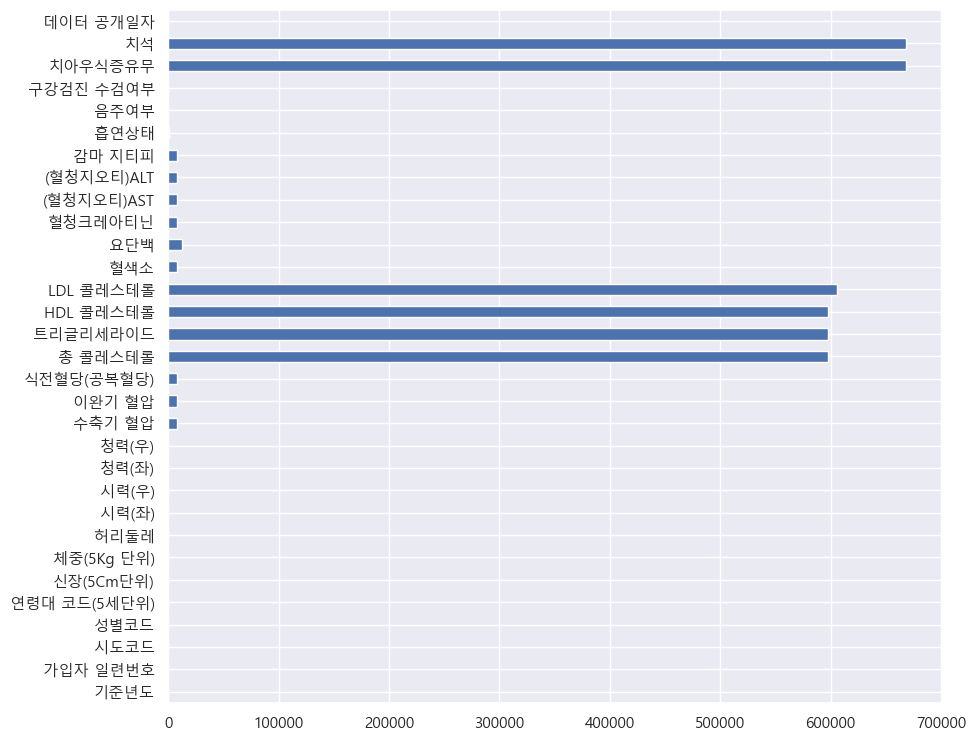

In [232]:
isnull_sum = df.isnull().sum()
df.isnull().sum().plot.barh(figsize=(10, 9))
# isnull_sum

---
### 2.3.3 일부 데이터 요약하기
---

In [233]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()
# 중앙값에 비해 평균값이 높음
# 평균값은 max 값에 의해 영향을 영향을 많이 받음

,(혈청지오티)ALT,(혈청지오티)AST
count,992398.000000,992399.000000
mean,26.759641,27.698337
std,25.835091,25.286659
min,1.000000,1.000000
25%,16.000000,20.000000
50%,21.000000,24.000000
75%,31.000000,30.000000
max,5990.000000,8712.000000


---
### 2.3.4 값 집계하기
---

In [234]:
df["성별코드"].value_counts()

1    510689
2    489311
Name: 성별코드, dtype: int64

In [235]:
df["흡연상태"].value_counts()
# 1 : 흡연하지 않는 사람 /  2 : 흡연하는 사람 / 3 : 흡연했지만 금연한 사람

1.0    626138
2.0    189808
3.0    183711
Name: 흡연상태, dtype: int64

---
## __2.4 groupBy와 pivot_table로 다양한 집계 연산 하기__
- 2개 이상의 데이터를 보기 위해서 groupby와 pivot_table을 사용
---

### 2.4.1 Groupby
---

In [236]:
# 성별코드 값에 따른 모든 열에 대한 평균
# 성별에 따라 각 열에서 여성과 남성의 평균 차이를 알고 싶을 때

df.groupby(["성별코드"]).mean()


,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2020.0,500358.619823,34.283801,11.778801,167.452735,69.713162,86.164883,0.98318,0.988278,1.048482,...,1.143432,0.968119,29.336907,31.001443,49.718945,2.014826,0.741792,0.362892,0.182544,0.610137
2,2020.0,499626.733920,33.801335,12.062784,154.191945,56.117776,78.382718,0.88072,0.879468,1.044093,...,1.100177,0.730214,25.980277,22.312075,25.258336,1.080009,0.420934,0.298499,0.150885,0.552335


In [237]:
#성별코드 값에 따라 모든 열에 대한 개수
# 여성과 남성이 각 열에서 검사한 인원 차이가 얼마나 나는지 확인하고 싶을 때

df.groupby(["성별코드"]).count()

,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,510689,510689,510689,510689,510689,510689,510648,510561,510563,510585,...,507950,507950,507949,507950,510526,510611,510689,185325,185324,510689
2,489311,489311,489311,489311,489311,489311,489244,489182,489185,489193,...,484448,484449,484449,484447,489131,489193,489311,146058,146058,489311


In [238]:
# 성별에 따른 음주상태를 확인하고 싶을 때, (음주하면 1, 안하면 0)
# 가입자 일련번호는 고유번호로 개수를 세기위해 넣음
# 음주는 남성 > 여성 이라는 것을 알 수 있음

df.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count()

성별코드  음주여부
1     0.0     131844
      1.0     378767
2     0.0     283275
      1.0     205918
Name: 가입자 일련번호, dtype: int64

In [239]:
# 음주는 하는 사람이 간수치가 높다는 것을 알 수 있음
# 남성이 대체로 높다는 것을 알 수 있음

df.groupby(["성별코드", "음주여부"])["감마 지티피"].mean()

df.groupby(["성별코드", "음주여부"])["감마 지티피"].describe()
# max 값 때문에 평균값이 편향되었다는 사실을 알 수 있음
# max : 999

count       mean        std  min   25%   50%   75%     max
성별코드 음주여부                                                               
1    0.0   130103.0  34.212195  38.533470  1.0  18.0  25.0  37.0  1731.0
     1.0   377769.0  55.059597  69.135224  1.0  24.0  36.0  60.0  2630.0
2    0.0   279033.0  24.177603  26.897676  1.0  14.0  18.0  26.0   999.0
     1.0   205296.0  26.728777  36.415153  1.0  14.0  18.0  27.0   999.0

In [240]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   130103  34.212195    25.0
     1.0   377769  55.059597    36.0
2    0.0   279033  24.177603    18.0
     1.0   205296  26.728777    18.0

---
### 2.4.2 Pivot
- pivot은 연산을 하지 않고 데이터의 구조를 바꾸고자 할 때 사용
- pivot_table의 연산 속도가 groupby보다 빠르고, 사용 방법이 직관적
- pivot_table에서 할 수 있는 것은 groupby에서 대부분 할 수 있고, groupby에서 할 수 있는 것은 pivot_table에서 할 수 있음
---

In [241]:
df.pivot_table(index="성별코드", values="가입자 일련번호", aggfunc="count")

,가입자 일련번호
성별코드,
1,510689
2,489311


In [242]:
df.pivot_table(index="음주여부", values="가입자 일련번호", aggfunc="count")

,가입자 일련번호
음주여부,
0.0,415119
1.0,584685


In [243]:
pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,15.0,20.0,30.0,409136.0,1731.0,27.368548,1.0,31.423282
1.0,18.0,28.0,48.0,583065.0,2630.0,45.084373,1.0,61.210826


In [244]:
df.groupby(by=["음주여부"])["감마 지티피"].describe()

,count,mean,std,min,25%,50%,75%,max
음주여부,,,,,,,,
0.0,409136.0,27.368548,31.423282,1.0,15.0,20.0,30.0,1731.0
1.0,583065.0,45.084373,61.210826,1.0,18.0,28.0,48.0,2630.0


In [245]:
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마 지티피", aggfunc="describe")

# df.groupby(by=["음주여부", "성별코드"])["감마 지티피"].describe()

25%   50%   75%     count     max       mean  min        std
음주여부 성별코드                                                               
0.0  1     18.0  25.0  37.0  130103.0  1731.0  34.212195  1.0  38.533470
     2     14.0  18.0  26.0  279033.0   999.0  24.177603  1.0  26.897676
1.0  1     24.0  36.0  60.0  377769.0  2630.0  55.059597  1.0  69.135224
     2     14.0  18.0  27.0  205296.0   999.0  26.728777  1.0  36.415153

---
## __2.5 범주형 데이터 시각화로 가설 검정하기__
- 100만개가 넘는 데이터를 시각화할 때, 속도가 느려지기 때문에
- groupby나 pivot_table로 필요한 데이터만 추출해서 시각화하는 것이 좋다

---
### 2.5.1 히스토그램(도수분포표)
- 도수분포표를 그래프로 나타낸 것(유니크 값의 분포가 얼마나 되는지 확인하기 용이함)
- 데이터프레임.hist(figsize = (m,n), bins=k)  
- bins는 내가 몇 개의 막대그래프로 표현하고 싶은지 입력하면 된, 크기가 클수록 자세하게 표현됨
---

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자 일련번호'}>,
        <AxesSubplot:title={'center':'시도코드'}>,
        <AxesSubplot:title={'center':'성별코드'}>,
        <AxesSubplot:title={'center':'연령대 코드(5세단위)'}>],
       [<AxesSubplot:title={'center':'신장(5Cm단위)'}>,
        <AxesSubplot:title={'center':'체중(5Kg 단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>,
        <AxesSubplot:title={'center':'시력(우)'}>],
       [<AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>,
        <AxesSubplot:title={'center':'수축기 혈압'}>,
        <AxesSubplot:title={'center':'이완기 혈압'}>,
        <AxesSubplot:title={'center':'식전혈당(공복혈당)'}>],
       [<AxesSubplot:title={'center':'총 콜레스테롤'}>,
        <AxesSubplot:title={'center':'트리글리세라이드'}>,
        <AxesSubplot:title={'center':'HDL 콜레스테롤'}>,
        <AxesSubplot:title={'center':'LDL 콜레스테롤'}>,
        <AxesSubplot:title={'center':'혈색소'}>],
   

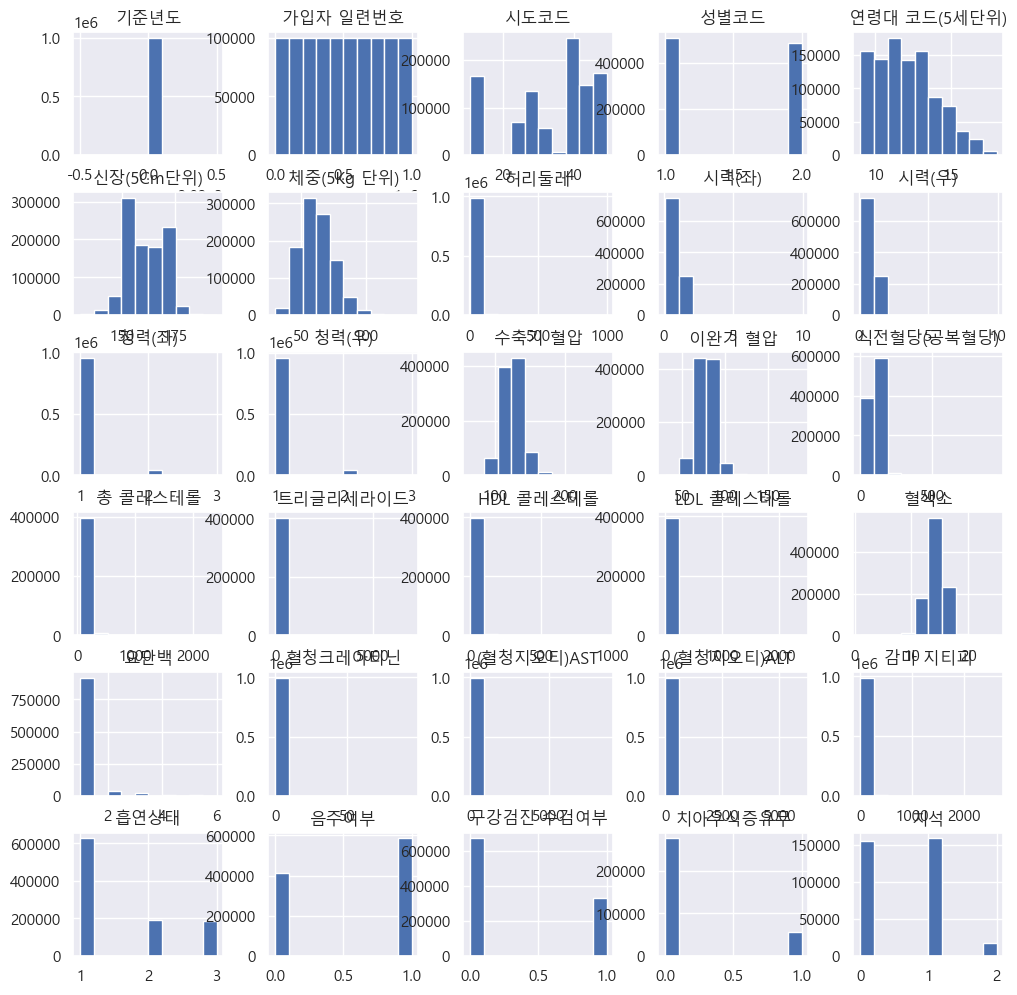

In [246]:
df.hist(figsize=(12,12))

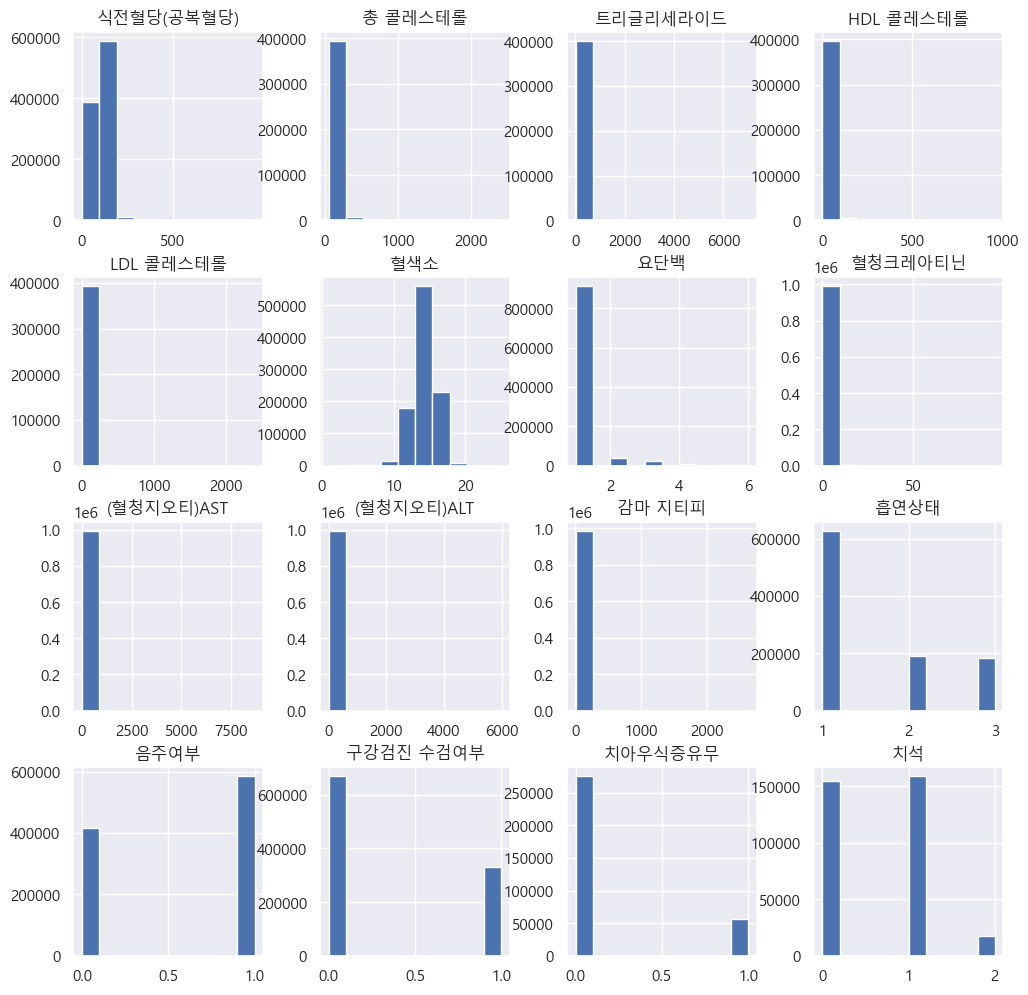

In [247]:
# h = df.iloc[:, :12].hist(figsize=(12,12)) # 0~11열까지
# h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100) # 12~23열까지
h = df.iloc[:, 14:36].hist(figsize=(12,12), bins=10) # 24~35열까지

---
### 2.5.2 Countplot (Seaborn) : 범주형(카테고리)데이터 시각화
- Seaborn은 데이터가 많으면 시간이 더 오래 걸림
- countplot은 범주형데이터의 수를 더한 값을 그래프로 표현함
- valuecount로 구한 값을 시각화한다고 생각하면 됨
---

- DataFrame.sample(frac, n, replace, random_state)  
    · frac : 전체 행에서 몇 %만 추출할 것인가 / 0~1사이 값만  
    · n : 몇개의 행을 추출할 것인가  
        ※ frac과 n은 동시에 쓸 수 없다.  
    · replace=False : default는 중복 비허용  
    · random_state : 설정 시 결과 고정  

In [248]:
df_sample = df.sample(1000, random_state=1)

<AxesSubplot:xlabel='음주여부', ylabel='count'>

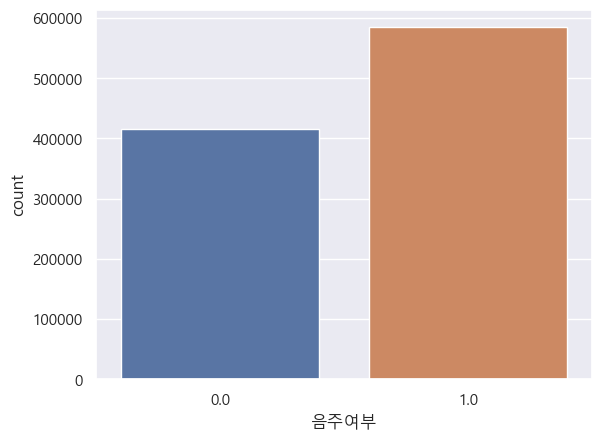

In [249]:
sns.set(font_scale=1.0, font='Malgun Gothic')

# df["음주여부"].value_counts().plot.bar()
sns.countplot(x="음주여부", data=df)

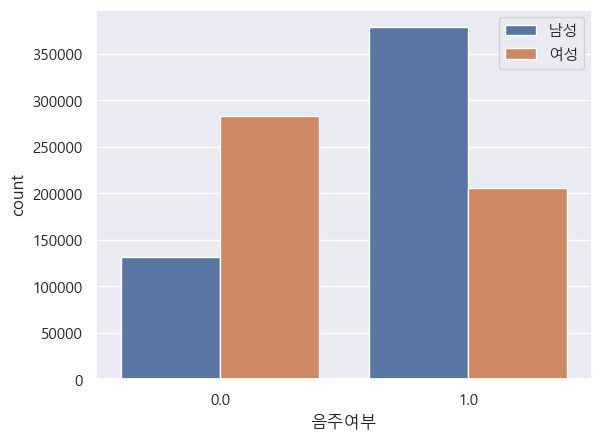

In [250]:
sns.countplot(x="음주여부", data=df, hue="성별코드")
plt.legend(["남성", "여성"])

# 남성이 여성보다 더 많이 음주하고 있다는 것을 알 수 있음

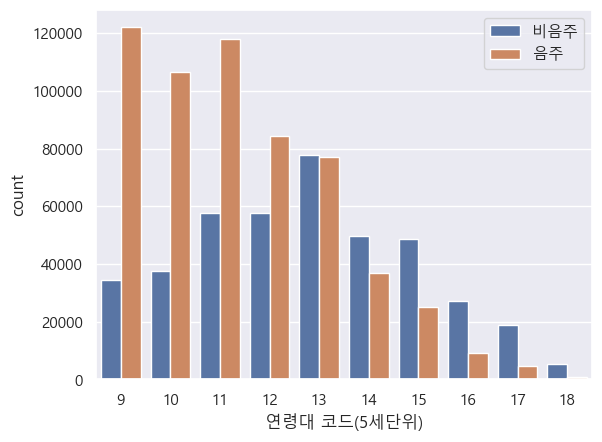

In [251]:
sns.countplot(data=df, x="연령대 코드(5세단위)", hue="음주여부")
plt.legend(["비음주", "음주"])

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

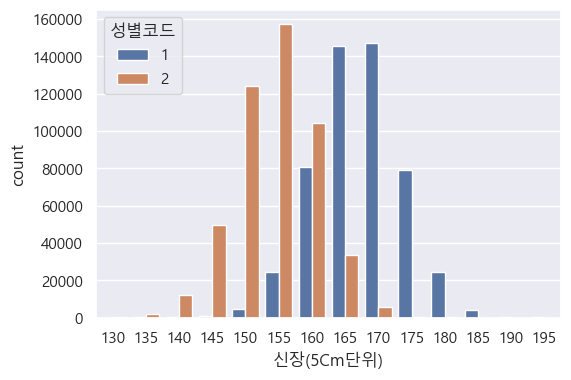

In [252]:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

# 여성과 남성의 신장 분포를 알 수 있음

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

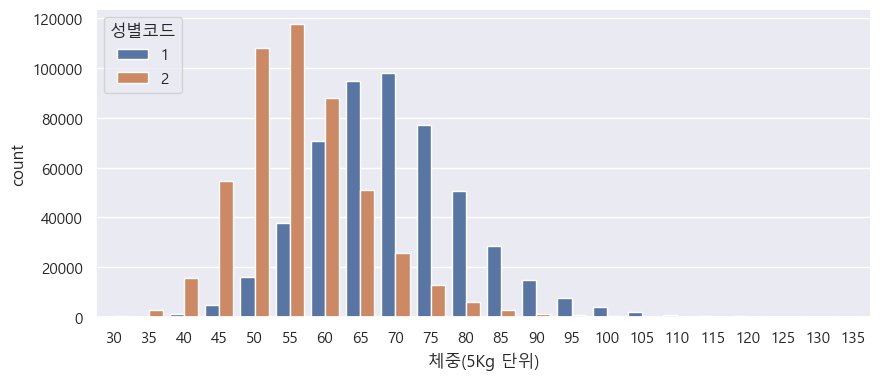

In [253]:
plt.figure(figsize=(10,4))

sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

# 남성이 대체로 체중이 더 많이 나가는구나


<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

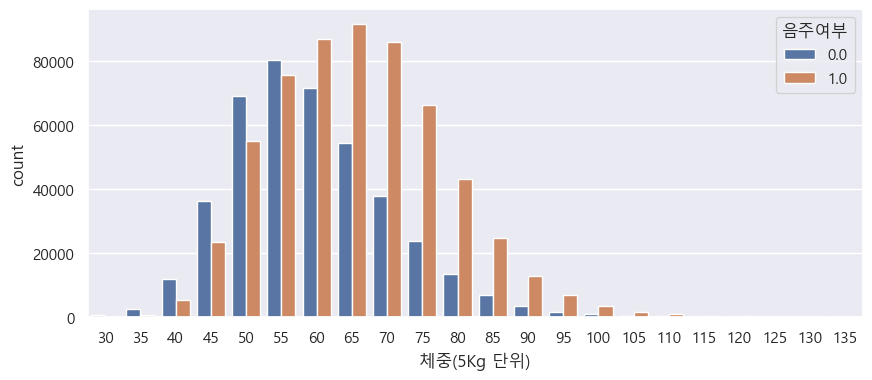

In [254]:
plt.figure(figsize=(10,4))

sns.countplot(data=df, x="체중(5Kg 단위)", hue="음주여부")

# 음주를 하는 사람이 대체로 체중이 많이 나간다는 것을 알 수 있음

---
### 2.5.3 barplot  : 수치형 vs 범주형데이터 시각화
- x축에는 카테고리, y축에는 수치형을 넣어서 
- x축에 수치형을 넣으면 막대가 너무 많아서 보기가 어려울 수 있음
---

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

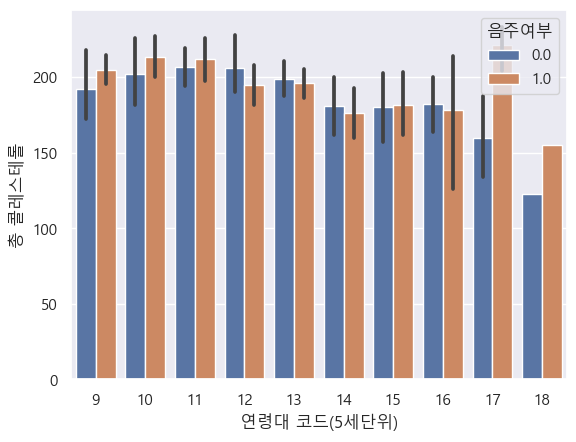

In [255]:
# 연령대코드와 총 콜레스테롤을 음주여부와 함께 보기
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="음주여부")

# 음주여부에 따라 콜레스테롤 수치가 차이가 있음을 알 수 있음

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

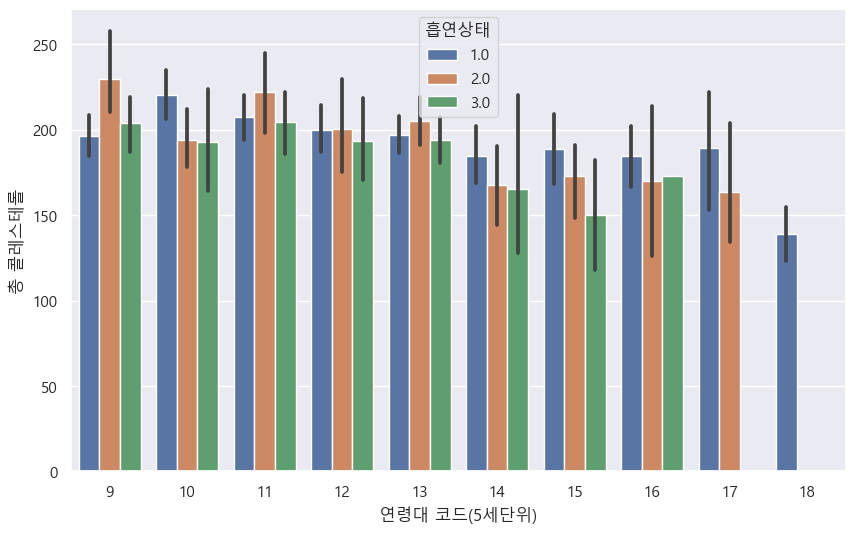

In [256]:
# 연령대코드와 총 콜레스테롤을 흡연상태와 함께 보기2
plt.figure(figsize=(10,6))
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="흡연상태")

# 흡연여부 따른 콜레스테롤 수치가 차이가 있음을 알 수 있음

In [257]:

df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='트리글리세라이드'>

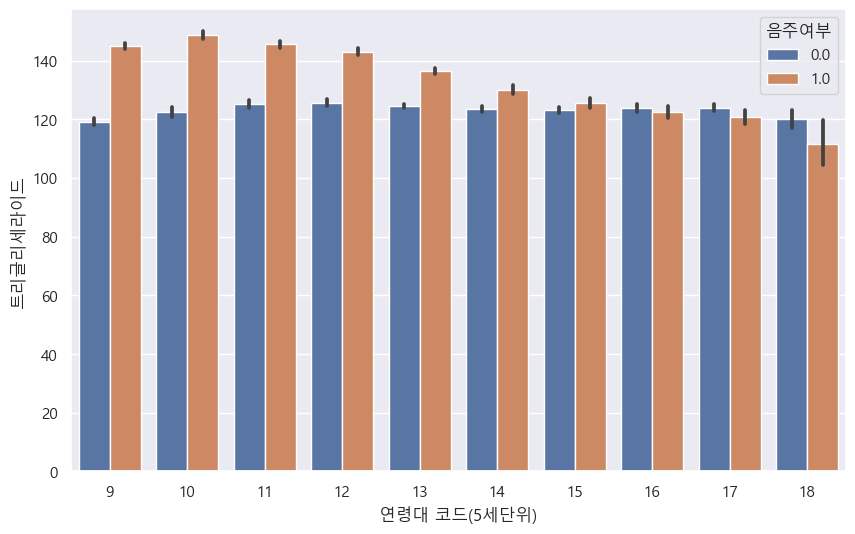

In [258]:
# 연령대코드와 중성지방수치(트리글리세라이드) 음주여부와 함께 보기3
plt.figure(figsize=(10,6))
sns.barplot(data=df
            , x="연령대 코드(5세단위)", y="트리글리세라이드", hue="음주여부"
            # ,ci = "sd") # 편차가 크다는 것을 알 수 있음
            ,ci = 95)

# 음주여부에 따라 중성지방의 차이가 얼마나 나는지 알 수 있음
# 검은색 막대는 신뢰구간을 나타냄 
# ci = 95가 기본값이고 "sd"는 표준편차를 의미한다, "none"은 표시하지 않음

<AxesSubplot:xlabel='성별코드', ylabel='체중(5Kg 단위)'>

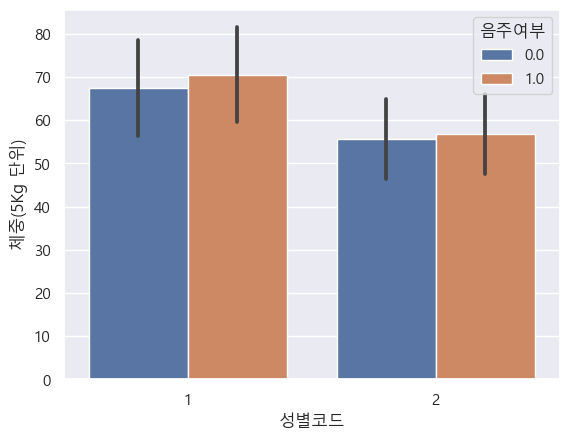

In [259]:
# 음주를 하는 사람들이 체중이 더 많이 나갈까? 성별을 구별해서 보고 싶다.
sns.barplot(data=df, y="체중(5Kg 단위)", x="성별코드", hue="음주여부", ci = "sd" )

---
### 2.5.4 lineplot & pointplot 
---

#### - lineplot

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

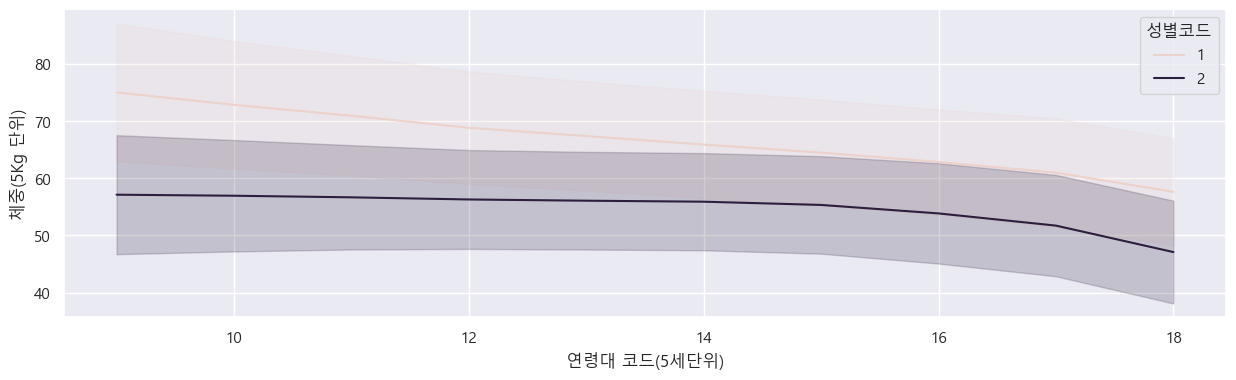

In [260]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci = "sd")

# 연령대가 높아질수록 체중이 적어지는 경향이 있구나

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

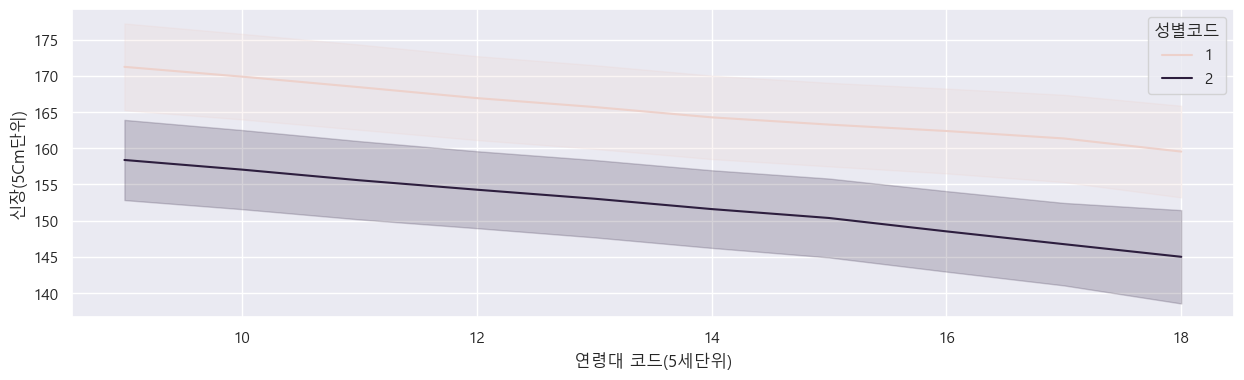

In [261]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

# 나이가 들수록 신장이 낮아지는구나
# 젊을수록 평균신장이 높아지는 경향이 있어서 그럴수도 있겠다

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

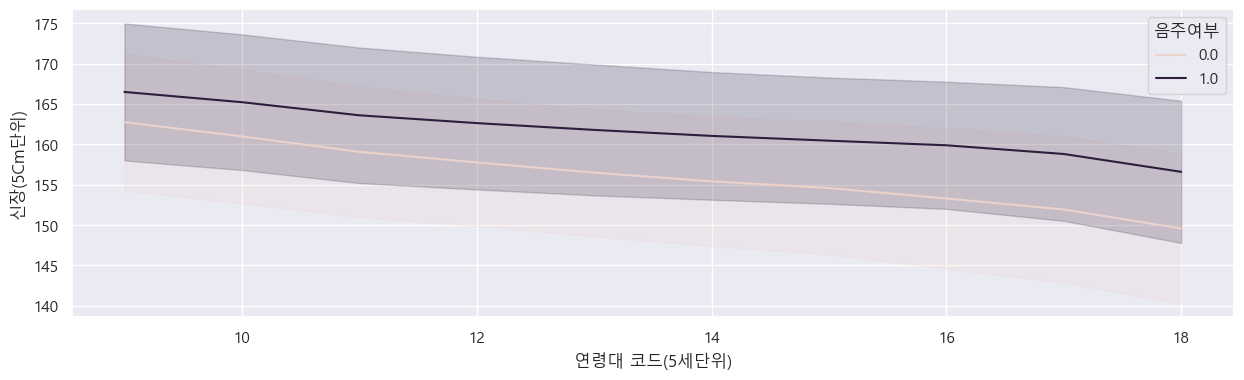

In [262]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

#### - pointplot

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

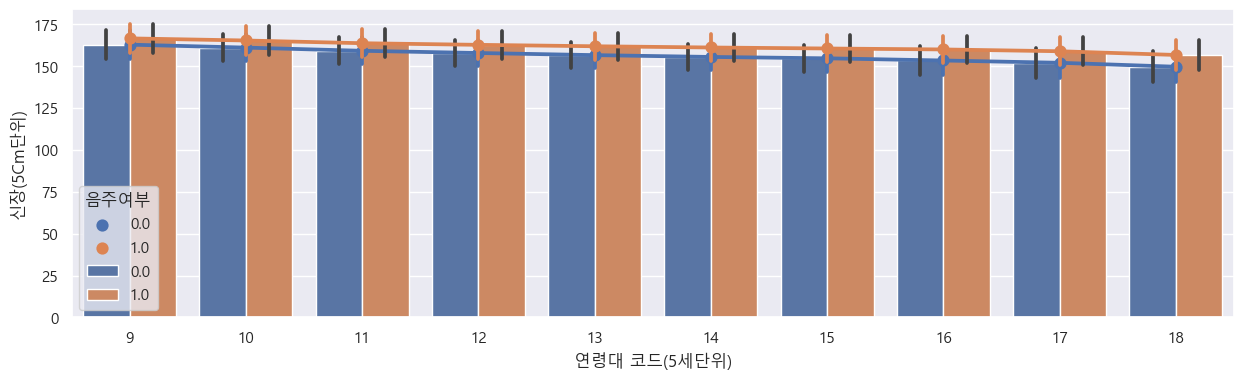

In [263]:
# pointplot과 barplot 같이 표현할 수 있음
plt.figure(figsize=(15,4))
sns.barplot(data=df, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

# pointplot는 막대를 통해서 신뢰구간, 표준편차를 나타내는 것이 큰 차이점

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

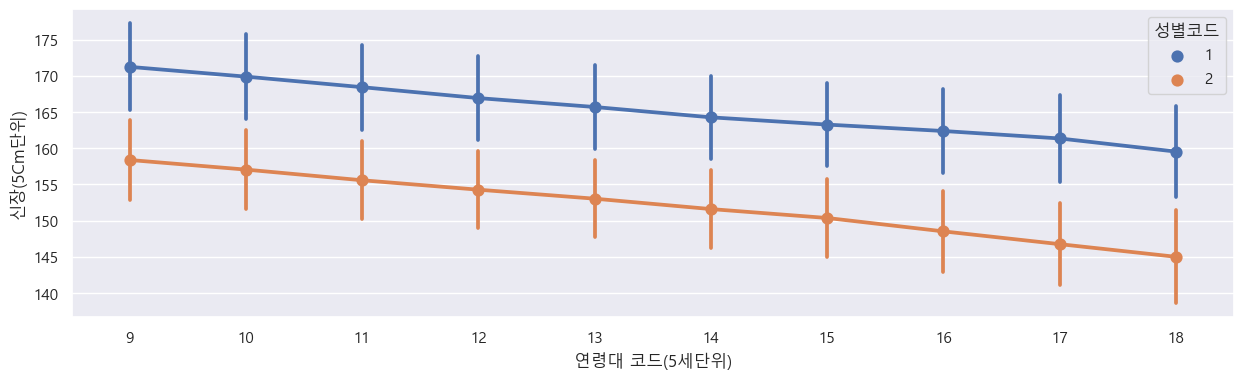

In [264]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

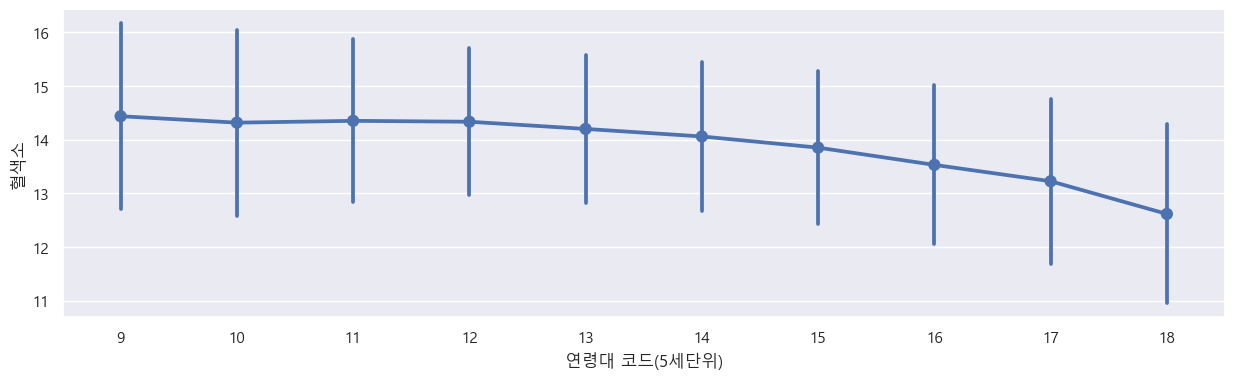

In [265]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대 코드(5세단위)", y="혈색소", ci="sd")

# 나이가 많아질수록 혈색소가 낮아진다는 것을 알 수 있음

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

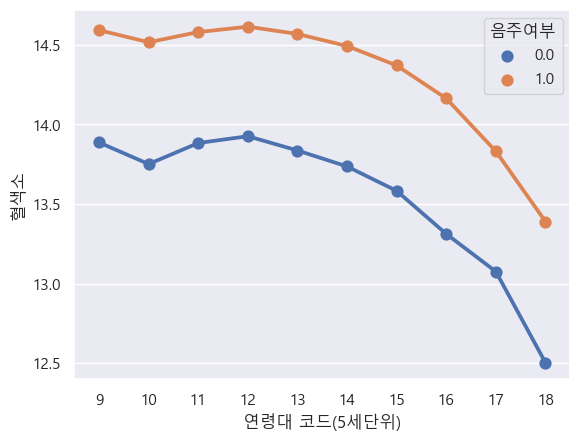

In [266]:
sns.pointplot(data=df, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

# 음주하는 사람들이 혈색소가 더 높은 편이네

---
### 2.5.5 boxplot (df, sns)
- 박스의 밑은 1사분위수(25%), 중간은 2사분위수(중앙값), 위는 3사분위수(75%)
- 점으로 표현된 값은 이상치
---

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

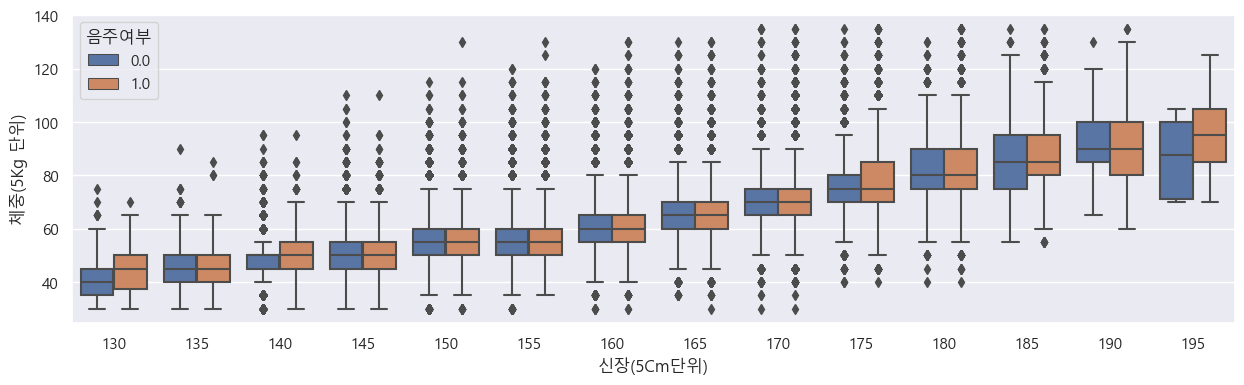

In [267]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

---
### 2.5.6 violinplot 
- (data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)
- ※ 범례를 split으로 붙여서 확인할 수 있음
- 가운데 작은 네모는 boxplot을 의미
- 흰 점은 중앙값을 의미
- 분포를 좀 더 자세히 확인 가능
---

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

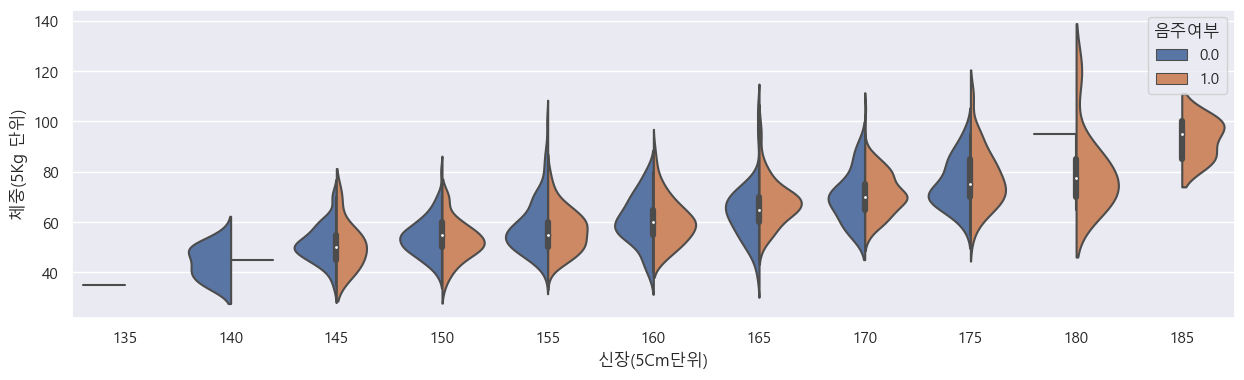

In [268]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부"
                , split=True)

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

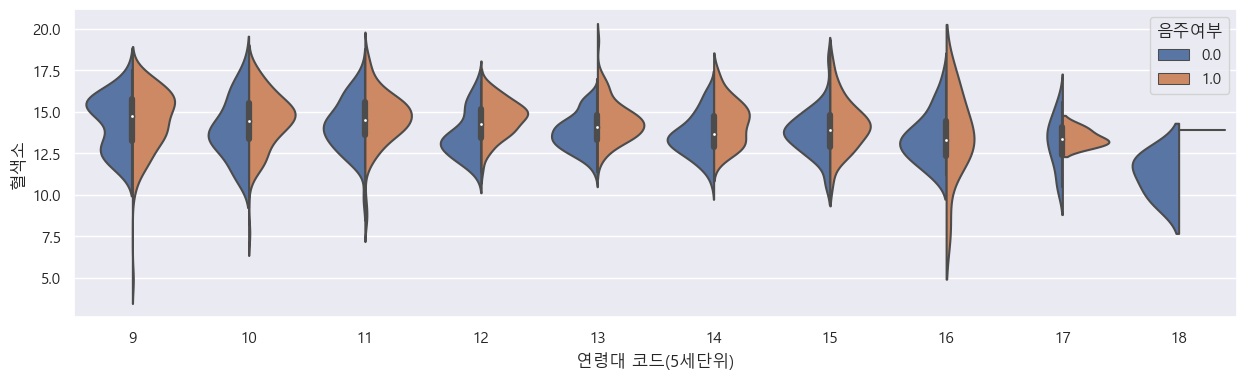

In [269]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", split=True)

---
### 2.5.7 swarm plot 
- (data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")
- 값이 어느정도 분포되어 있는지 확인하기 좋음
- 범주형 데이터를 산점도로 시각화하고자 할 때 
---

c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.9% of the points cann

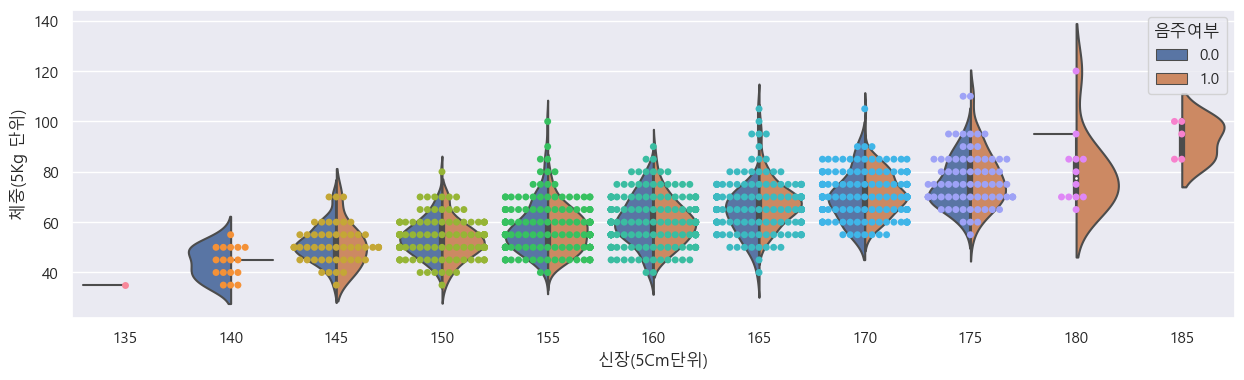

In [270]:
plt.figure(figsize=(15, 4))
p = sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)
q = sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)")

c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


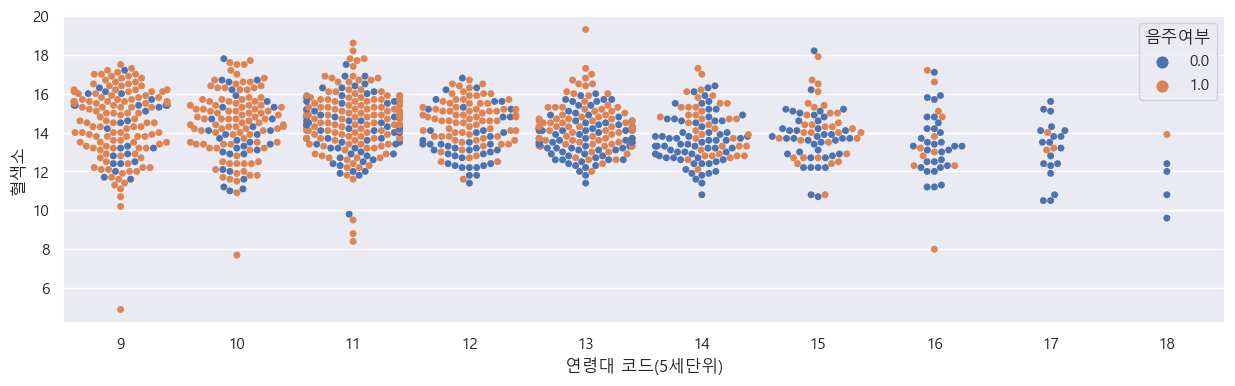

In [271]:
plt.figure(figsize=(15, 4)) 
q = sns.swarmplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue = "음주여부")

---
### 2.5.8 lmplot
- 회귀선을 그리거나 다변수의 그래프를 파악하기 좋음
- 상관관계를 파악할 수 있음
- col을 이용해서 다변수를 여러 그래프로 한 번에 볼 수 있음.  
    ※가장큰 장점
---

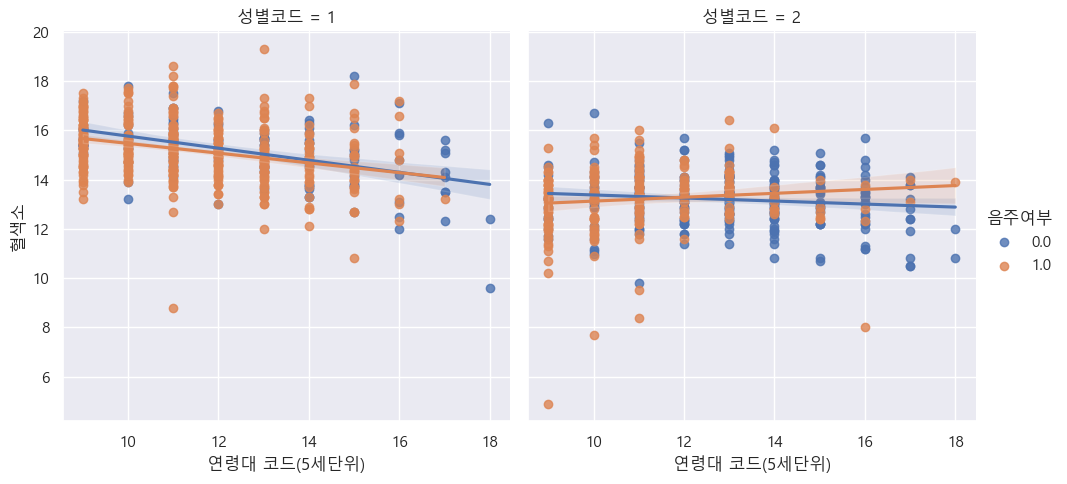

In [272]:
sns.lmplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue = "음주여부"
            , col = "성별코드")

---
## __2.6 수치형 데이터 시각화로 가설 검정하기__
---

---
### 2.6.1 scatterplot : 산점도
- 수치형 vs 수치형 데이터의 상관관계를 볼 때 주로 사용함
-  x, y가 모두 수치형 데이터일 때 
- 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있음
---

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

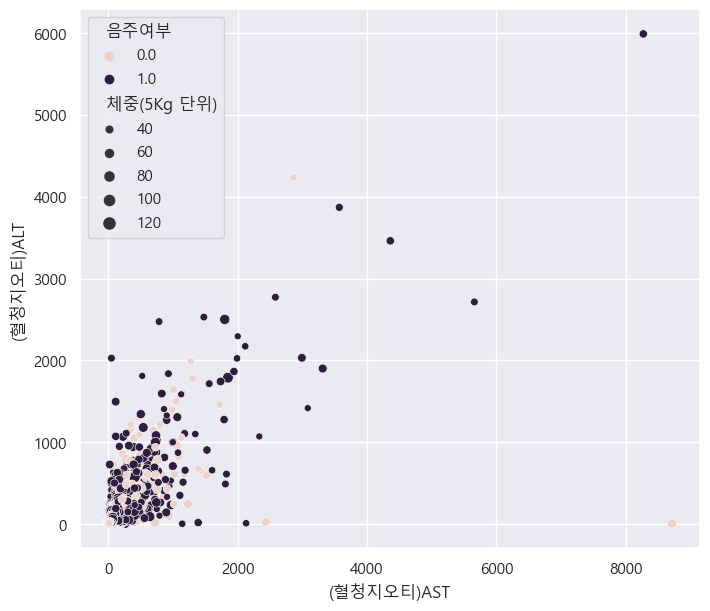

In [273]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue = "음주여부",
                size = "체중(5Kg 단위)")

---
### 2.6.2 lmplot 으로 상관관계 보기

- sns.lmplot(data = df_sample  
            , x = '(혈청지오티)AST' 
            , y = '(혈청지오티)ALT' 
            , hue="음주여부"  
            , robust=True) # 이상치 제외
---

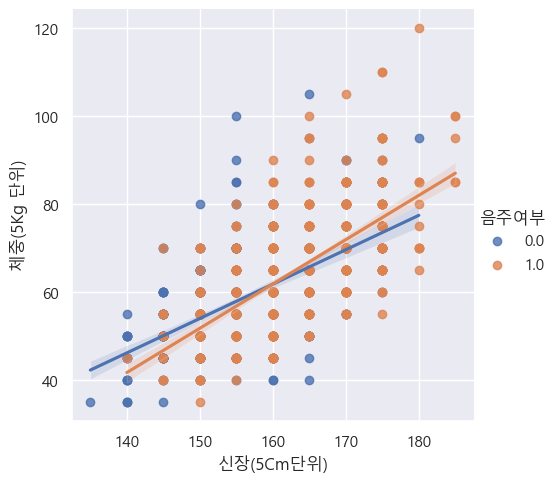

In [274]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

# 연속되 수치데이터임에도 5kg, 5cm단위로 카테고리화 되어있어 그리드처러 격차로 나옴

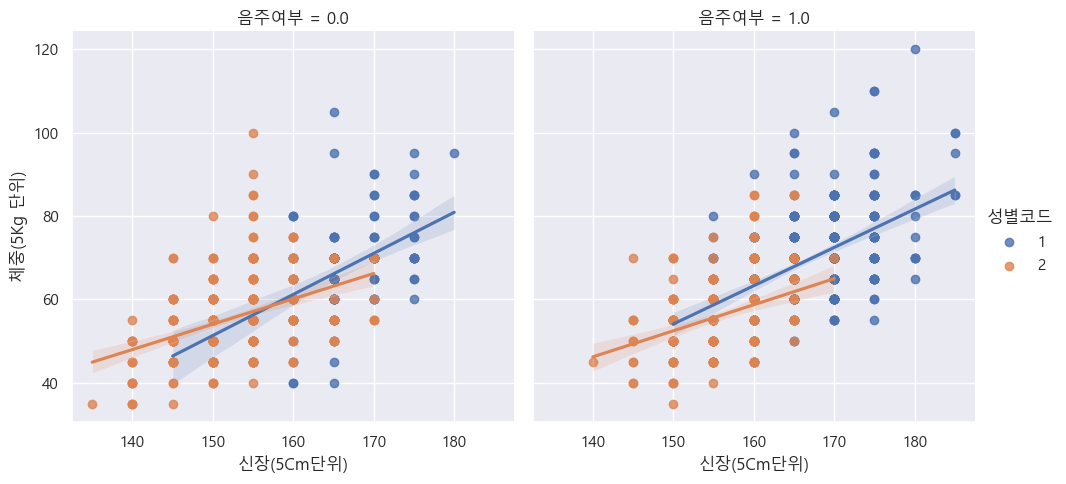

In [275]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드", col="음주여부")

# 음주여부에 따라 그래프를 따로 볼 수 있음
# 체중과 신장은 양의 상관관계

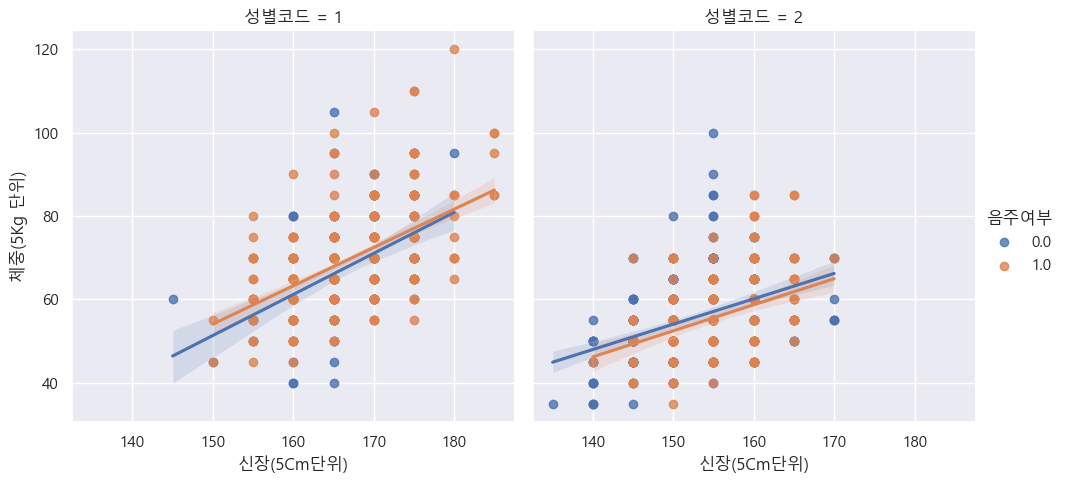

In [276]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", col="성별코드")

# 신장, 체중은 음주여부에 따라 강한 상관성은 없어보인다.  
# ( 여성은 음주를 하는 사람이 좀 더 체중이 많이 나감)

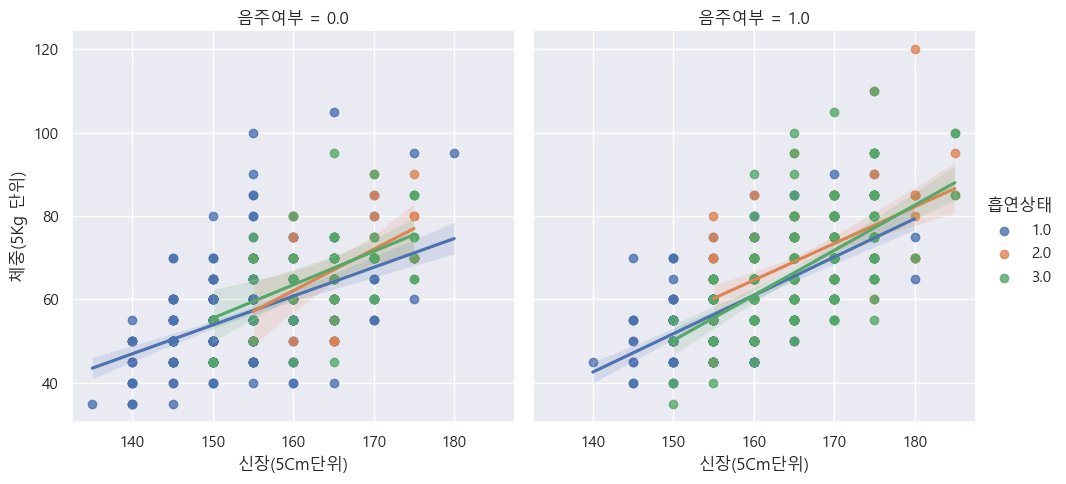

In [277]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="흡연상태", col="음주여부")

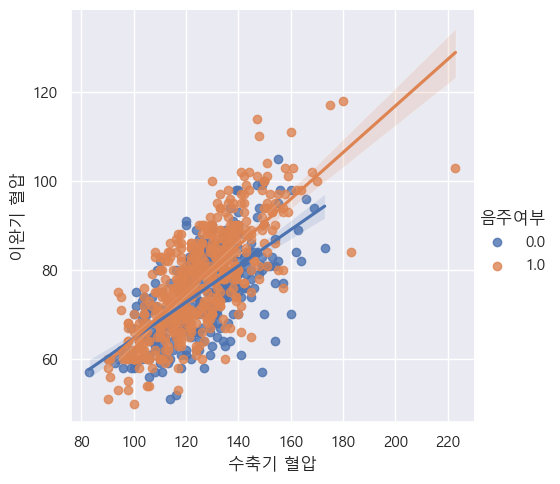

In [278]:
sns.lmplot(data=df_sample, x="수축기 혈압", y="이완기 혈압", hue="음주여부")

# 음주를 하는 사람들이 혈압이 더 높은 걸로 보아 
# 음주와 혈압은 상관관계가 높아 보인다.

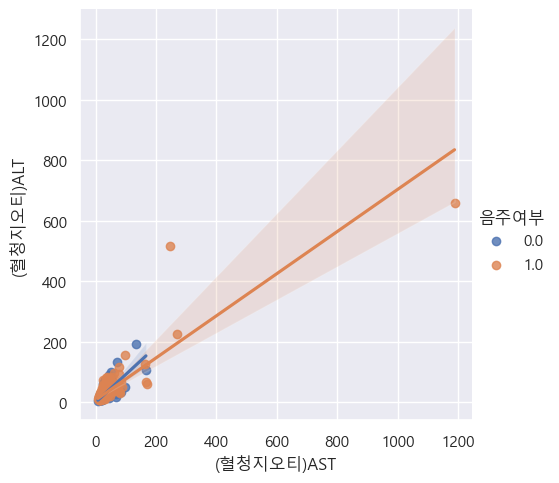

In [296]:
sns.lmplot(data = df_sample
            , x = '(혈청지오티)AST'
            , y = '(혈청지오티)ALT'
            , hue="음주여부"
            , robust=True) #이상치를 제외하고 그래프를 그릴 수 있지만 오래걸림!



---
### 2.6.3 이상치 다루기
---

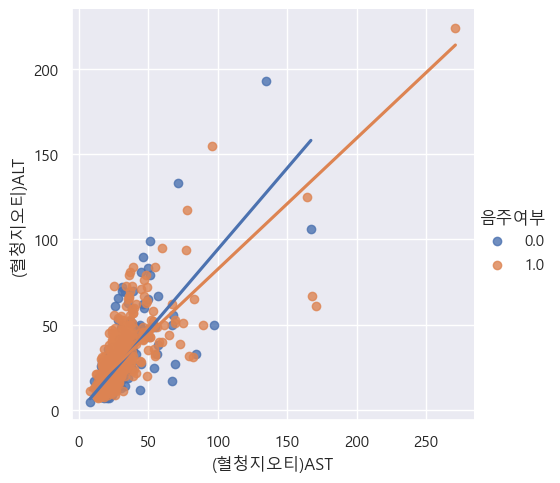

In [303]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 "400 이하"인 값만 표현하기 위해 데이터를 추출(이상치 제외한 데이터프레임)
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]

# 이상치를 제거한 "(혈청지오티)AST" 와 "(혈청지오티)ALT" 를 lmplot으로 그리며 음주여부에 따라 다른 색으로 표현

sns.lmplot(data=df_ASLT,  x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

# 이상치에 덜 영향을 받는 회귀선을 그릴 수 있음

,청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
113014,1.0,1.0,100.0,58.0,112.0,NaN,NaN,NaN,NaN,14.9,1.0,0.7,8712.0,6.0,71.0,3.0,0.0
310369,1.0,1.0,92.0,73.0,75.0,91.0,158.0,19.0,40.0,13.8,2.0,4.4,8270.0,5990.0,355.0,1.0,1.0


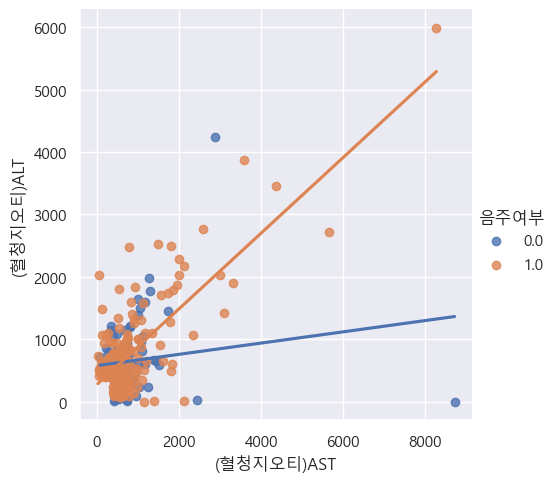

In [306]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 "400 이상"인 값만 추출하기
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]

# 400이상의 데이터만 볼 수 있음
sns.lmplot(data=df_ASLT_high,  x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

# 8000이 넘는 데이터만 확인
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

---
### 2.6.4 distplot : 확률밀도함수
- distplot은 "결측치"가 있으면 "그릴 수 없음"
- 모든 점에 대해 적분하면 1이 됨
---

In [316]:
df_chol = df.loc[df["총 콜레스테롤"].notnull(), "총 콜레스테롤"]
df_chol.head()

0    188.0
4    220.0
5    234.0
6    119.0
8    177.0
Name: 총 콜레스테롤, dtype: float64

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

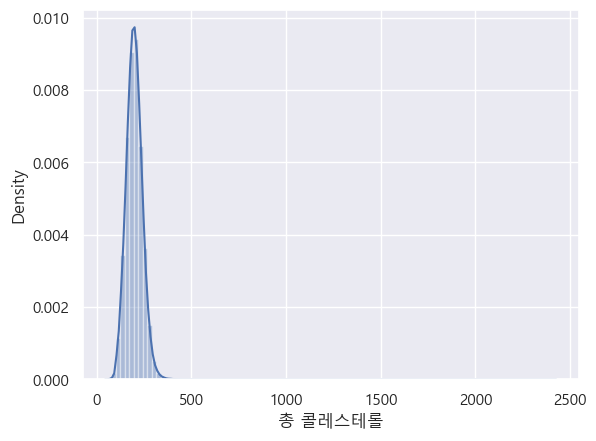

In [323]:
# "총콜레스테롤" 에 따른 distplot 을 그립니다.
sns.distplot(df_chol, bins = 100)

# 값이 얼마나 치우쳐져 있는지, 왜도
# 그래프가 얼마나 뾰족한지, 첨도 
# 알 수 있음

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

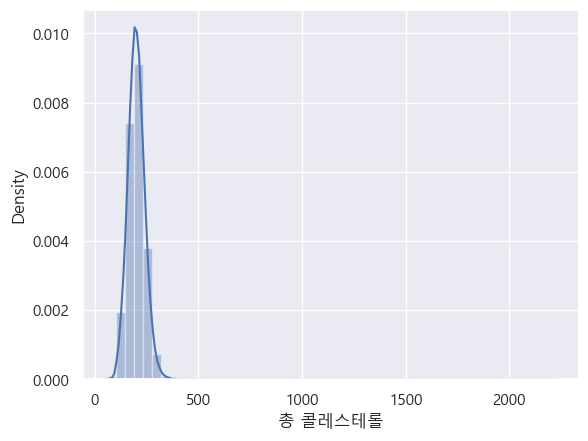

In [357]:
# 음주여부가 1인 값에 대한 "총 콜레스테롤"을 displot으로 그려보기
sns.distplot(df.loc[
                    (df["총 콜레스테롤"].notnull()) & (df["음주여부"] == 1) 
                    , "총 콜레스테롤"  
                    ] 
                    )
# plt.xlim(0,500)

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

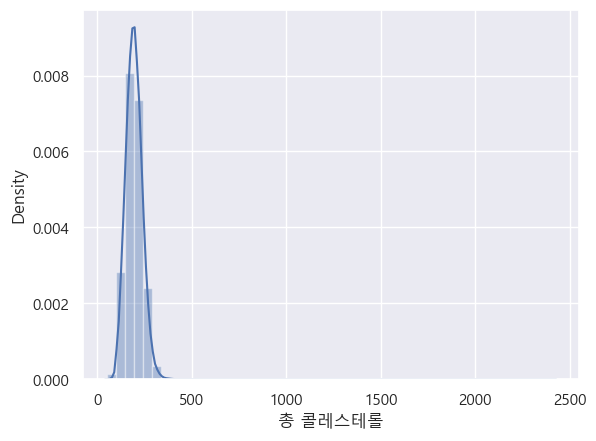

In [356]:
# 음주여부가 0인 값에 대한 "총 콜레스테롤"을 displot으로 그려보기
sns.distplot(df.loc[
                    (df["총 콜레스테롤"].notnull()) & (df["음주여부"] == 0) 
                    , "총 콜레스테롤"  
                    ] 
                    )
# plt.xlim(0,500)

# 음주하는 사람들이 살짝 더 높은 콜레스테롤 수치를 갖는다는 것을 알 수 있음

---
### 2.6.5 kdeplot : 커널 밀도 추정(KDE: Kernel Density Estimator)
- 보통 분포를 확인할 때 히스토그램(histogram)을 많이 활용하는데
- 히스토그램은 구간을 어떻게 설정하냐에 따라 결과물이 매우 달라져서, 엉뚱한 결론과 해석을 내릴 수 있기 때문에 조심해야하며
- 그 대안으로 많이 쓰이는 게 커널 밀도 추정(KDE: Kernel Density Estimator)이다.
---

<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

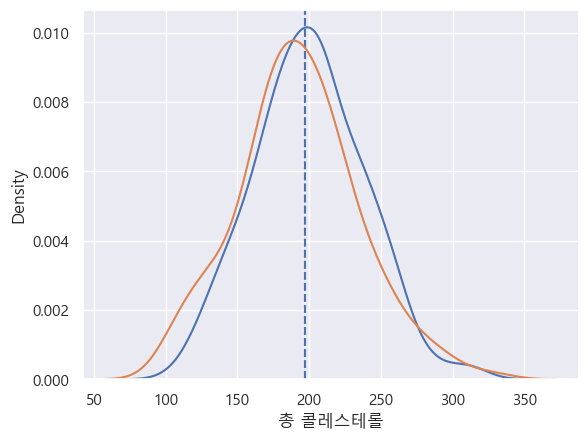

In [363]:
# 음주여부에 대한 콜레스테롤을 더 잘 비교하시 위해서 "하나의 그래프에" 표시되도록 한다

plt.axvline(df_sample["총 콜레스테롤"].mean(), linestyle=":")
# 그래프에 평균값 표시

plt.axvline(df_sample["총 콜레스테롤"].median(), linestyle="--")
# 그래프에 중앙값 표시

sns.kdeplot(df_sample.loc[
                df_sample["총 콜레스테롤"].notnull() & (df["음주여부"] == 1), 
                "총 콜레스테롤"]
                , label="음주 중")

sns.kdeplot(df_sample.loc[
                df_sample["총 콜레스테롤"].notnull() & (df["음주여부"] == 0), 
                "총 콜레스테롤"]
                , label="음주 안 함")

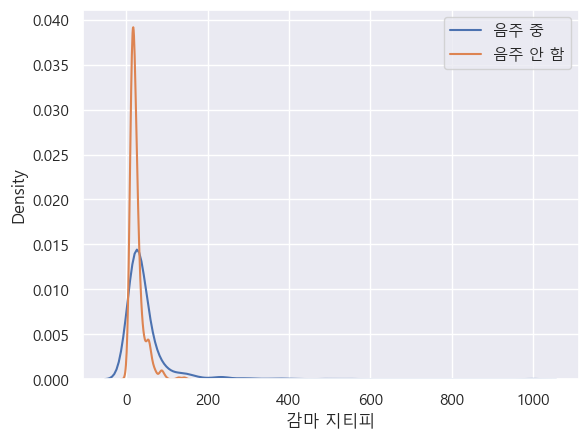

In [387]:
# 감마지티피 값에 따라 음주여부 시각화하기

s_1 = df_sample.loc[df["음주여부"] == 1, "감마 지티피"]
s_0 = df_sample.loc[df["음주여부"] == 0, "감마 지티피"]

# sns.distplot(s_1, label = "음주 중")
# sns.distplot(s_0, label = "음주 안 함")

sns.kdeplot(s_1, label = "음주 중")
sns.kdeplot(s_0, label = "음주 안 함")

plt.legend()

# 음주하고 있는 사람들이 감마지티피 수치가 낮구나
# ※감마지티피 : 조직의 세포막에 존재하여 질병을 방어하는 역할을 하며 알코올에 민감하게 반응함.

---
## __2.7 상관분석__
---
< 가설 >
- 음주 여부에 따라 건강검진 수치 차이가 있을까?
-  신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
    - 신장은 혈중크레아티닌 농도와 관련있음
---


### 2.7.1 corr()
- 두 변수간의 관계의 강도를 상관관계라고 하며
- 연관된 정도를 나타낸다. 하지만 인과관계를 뜻하는 것은 아니다.
```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```
---

In [397]:
# 상관계수에 사용할 컬럼을 변수에 담기
columns = ['연령대 코드(5세단위)', '체중(5Kg 단위)', '신장(5Cm단위)', '허리둘레', 
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
           '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', 
           '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백', 
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부']


# 샘플컬럼만 가져와서 df_small 이라는 데이터프레임에 담은 뒤 상관계수 확인하기

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

,연령대 코드(5세단위),체중(5Kg 단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
연령대 코드(5세단위),1.000000,-0.221678,-0.414363,0.102985,-0.237792,-0.137480,0.184846,0.203279,0.216743,-0.038870,...,-0.061317,-0.232499,-0.199607,0.029036,0.056892,0.034710,-0.040384,-0.066488,-0.164761,-0.351909
체중(5Kg 단위),-0.221678,1.000000,0.658184,0.805619,0.081166,0.079245,-0.028658,-0.048024,0.215313,0.283006,...,-0.376817,0.048177,0.442815,0.047369,0.295684,0.043985,0.166618,0.188488,0.354371,0.249972
신장(5Cm단위),-0.414363,0.658184,1.000000,0.343317,0.152171,0.128649,-0.076783,-0.084849,0.012064,0.187853,...,-0.217301,0.086425,0.529142,0.018102,0.332333,0.017348,0.105957,0.188727,0.472717,0.382014
허리둘레,0.102985,0.805619,0.343317,1.000000,-0.044147,0.009605,0.045806,0.040701,0.283801,0.244159,...,-0.371869,-0.010353,0.309017,0.081128,0.274298,0.049168,0.155557,0.189805,0.238003,0.104278
시력(좌),-0.237792,0.081166,0.152171,-0.044147,1.000000,0.433458,-0.047886,-0.074372,-0.052692,0.052792,...,0.083304,0.121976,0.177170,-0.045523,0.012852,0.033127,0.062018,0.034567,0.080803,0.103582
시력(우),-0.137480,0.079245,0.128649,0.009605,0.433458,1.000000,0.006876,0.068536,0.028258,0.088776,...,0.048880,0.015400,0.100567,-0.020949,0.026207,0.046738,0.035968,0.017729,0.046521,0.016161
청력(좌),0.184846,-0.028658,-0.076783,0.045806,-0.047886,0.006876,1.000000,0.539898,0.007149,-0.058250,...,0.062997,-0.066330,-0.020269,0.036570,0.059373,0.120677,0.069661,0.023333,0.007110,-0.030589
청력(우),0.203279,-0.048024,-0.084849,0.040701,-0.074372,0.068536,0.539898,1.000000,0.077659,0.023436,...,0.050283,-0.014391,-0.028879,0.085775,0.049110,0.133025,0.082986,-0.011064,-0.006057,-0.076072
수축기 혈압,0.216743,0.215313,0.012064,0.283801,-0.052692,0.028258,0.007149,0.077659,1.000000,0.705049,...,-0.017135,0.002647,0.137943,0.081573,0.050265,0.029849,0.058523,0.098947,0.044218,-0.030979
이완기 혈압,-0.038870,0.283006,0.187853,0.244159,0.052792,0.088776,-0.058250,0.023436,0.705049,1.000000,...,-0.018571,0.063261,0.300474,0.066156,0.077608,0.057943,0.118465,0.141388,0.126144,0.111988


In [408]:
# 키에 대한 상관계수가 0.3 이상, 강한 상관관계가 존재하는 변수만 보고 싶을 때

df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

체중(5Kg 단위)    0.658184
신장(5Cm단위)     1.000000
허리둘레          0.343317
혈색소           0.529142
혈청크레아티닌       0.332333
흡연상태          0.472717
음주여부          0.382014
Name: 신장(5Cm단위), dtype: float64

In [399]:
# 음주여부에 대한 상관계수가 0.25 이상, 강한 상관관계를 띄는 것만 보고 싶을 때

df_corr.loc[df_corr["음주여부"] > 0.25,"음주여부"]

신장(5Cm단위)    0.382014
흡연상태         0.289827
음주여부         1.000000
Name: 음주여부, dtype: float64

In [412]:
# 혈색소에 대한 다른 변수들의 상관계수를 내림차순으로 볼 수 있음
df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.529142
체중(5Kg 단위)    0.442815
흡연상태          0.437007
허리둘레          0.309017
혈청크레아티닌       0.302206
이완기 혈압        0.300474
Name: 혈색소, dtype: float64

In [413]:
# 감마지티피에 대한 다른 변수들의 상관계수를 내림차순으로 볼 수 있음
df_corr["감마 지티피"].sort_values(ascending=False).head(7)

감마 지티피        1.000000
(혈청지오티)ALT    0.389966
(혈청지오티)AST    0.321716
트리글리세라이드      0.265705
혈색소           0.231606
흡연상태          0.216500
식전혈당(공복혈당)    0.205471
Name: 감마 지티피, dtype: float64

---
### 2.7.2 heatmap
- 다른 그래프와 달리 heatmap은 바로 "data만" 넣어중
- 상관 관계가 클수록 값이 색이 진해짐
- 옵션
    - annot : 숫자를 나타냄
    - fmt : 소수점 갯수를 지정
    - cmap : 색상을 지정
    - vmax, vmin : 색상 농도를 지정
    - mask : Generate a mask for the upper triangle
        - np.triu(np.ones_like(corr, dtype=bool))을 이용해서 boolean값을 가진 곳만 표시되도록 한다.
---

In [426]:
a = np.array([[1, 2, 3, 4], 
             [5, 6, 7, 8],
             [9, 10, 11, 12],
             [13, 14, 15, 16]])

np.triu(np.ones_like(a, dtype=np.bool))

# np.triu : 상삼각행렬을 만들어줌

C:\Users\USER\AppData\Local\Temp\ipykernel_19296\2154962659.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones_like(a, dtype=np.bool))


array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

---

C:\Users\USER\AppData\Local\Temp\ipykernel_19296\2425051278.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


<AxesSubplot:>

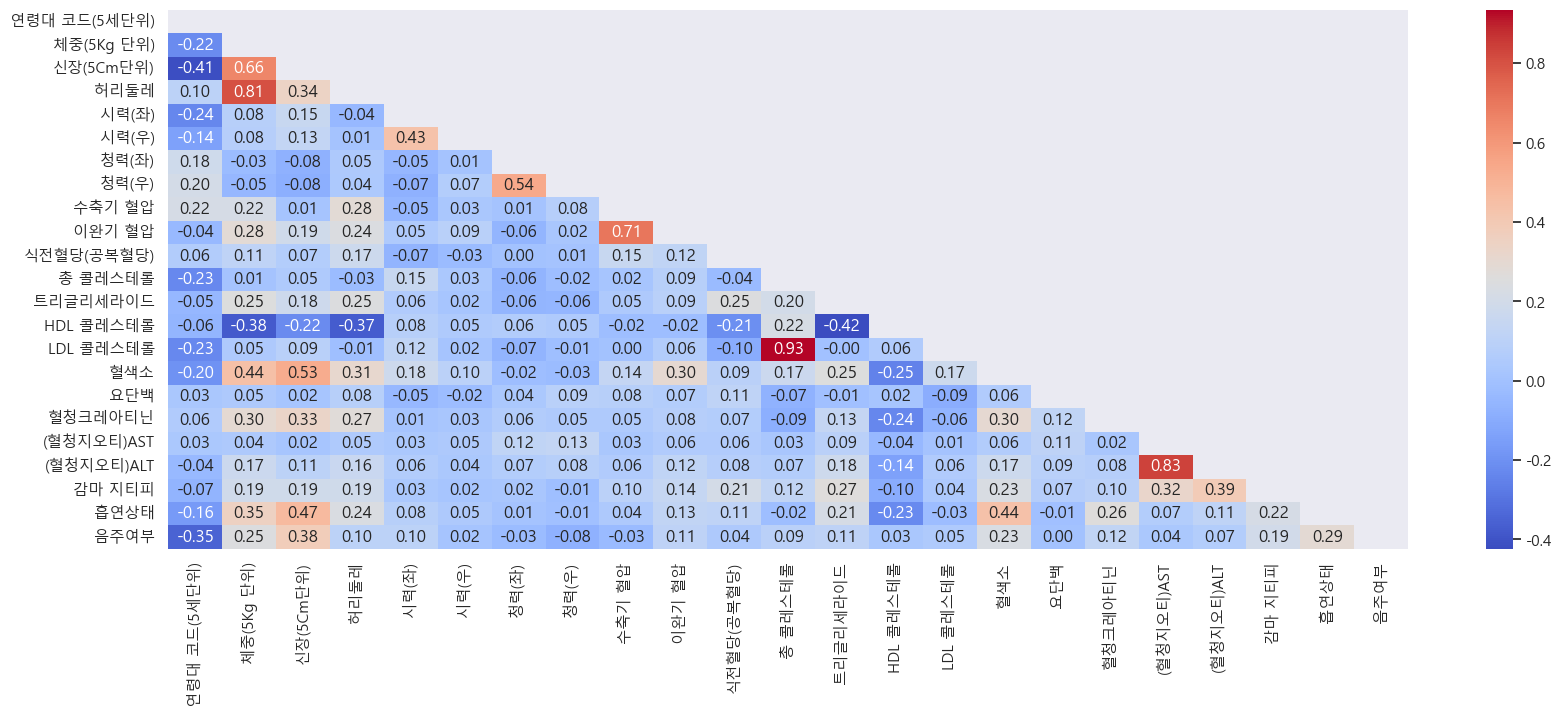

In [418]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr
            , annot=True
            , fmt=".2f"
            , cmap="coolwarm"
            # , vmin = -1, vmax = 1
            , mask=mask)

### 결론
- 음주 여부에 따라 건강검진 수치가 차이가 있음
- 신장과 허리둘레의 크기는 체중과 상관관계